In [1]:
import torch as T
import numpy as np
from matplotlib import pyplot as plt
from agent import load_model, Agent

In [66]:
def plot_weights_distributions(models):
    model_count = len(models)
    
    layer_keys = list(filter(lambda key: key.startswith('net.') and key.endswith('.weight'), list(models[0]['model_state_dict'].keys())))
    layer_count = len(layer_keys)
    
    fig, axs = plt.subplots(model_count, layer_count)
    fig.set_size_inches(18.5, 10.5)

    for i in range(layer_count):
        axs[0, i].set_title(f"Layer {i}")
        
   # for i in range(model_count):
    #    axs[i, 0].set_title(models[i]['name'])

    for i in range(model_count):
        for k in range(layer_count):
            w = models[i]['model_state_dict'][f"net.{k * 2}.weight"].cpu().data.numpy().reshape(-1)

            axs[i, k].hist(w, bins=70, orientation='horizontal')

    _ = plt.plot()

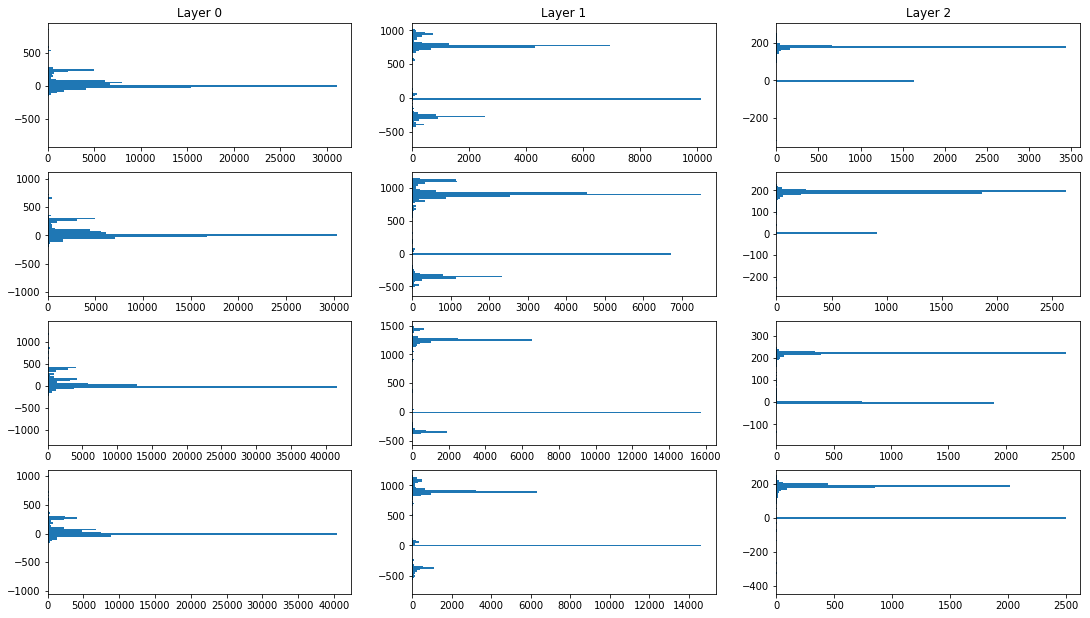

In [53]:
names =['Anne', 'Tori', 'Hitler', 'Miss lu']

models = [load_model(name, path = "Adam") for name in names]

plot_weights_distributions(models)

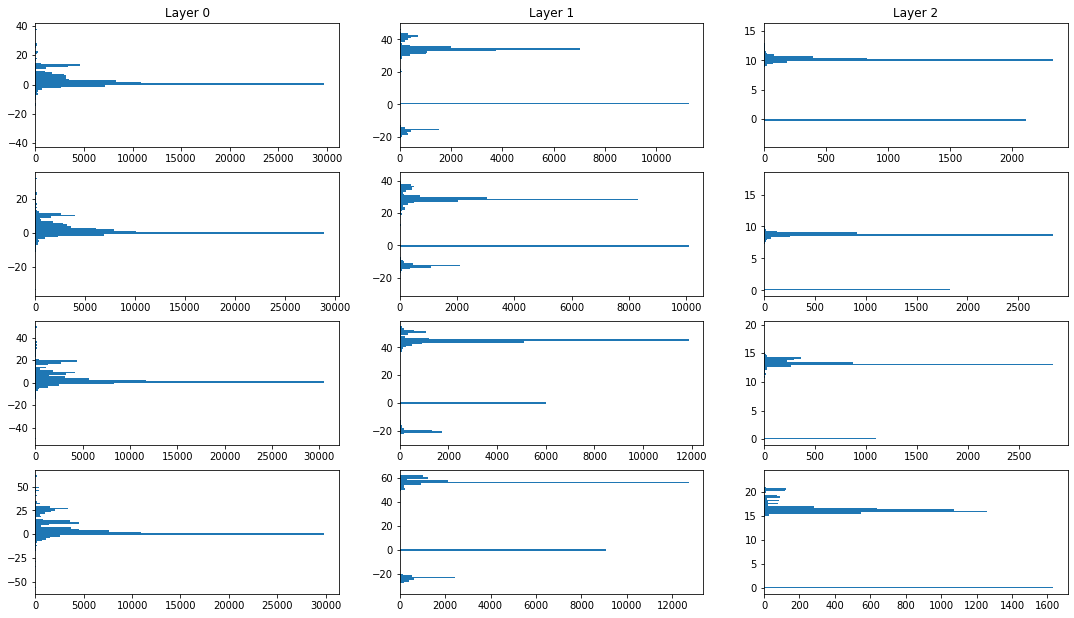

In [58]:
names = ['Bauti', 'Pablo', 'Papa', 'Mama']

models = [load_model(name) for name in names]

plot_weights_distributions(models)

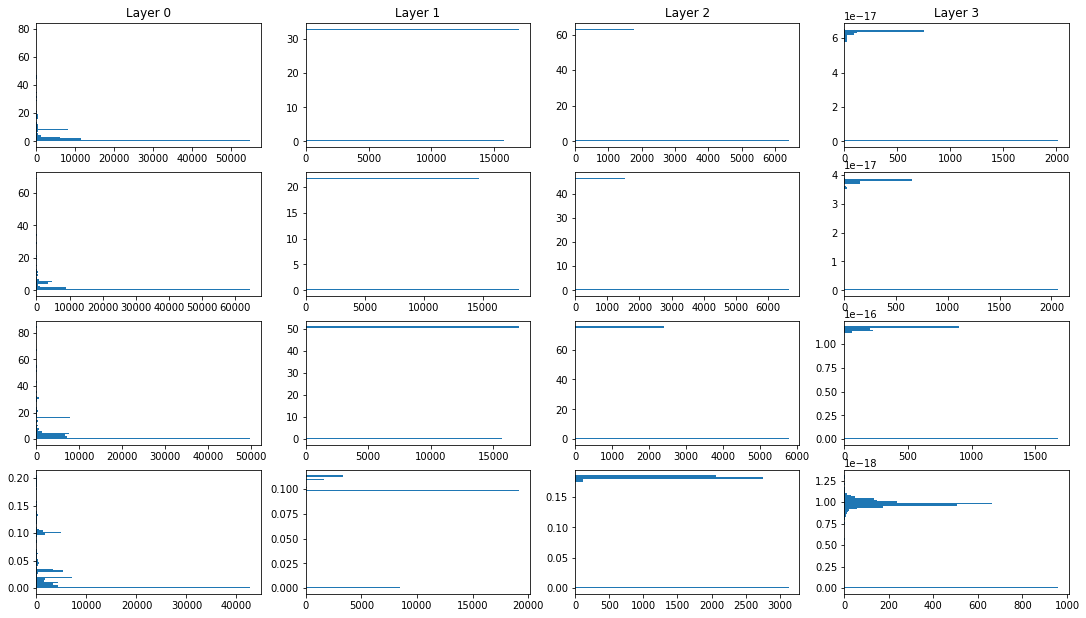

In [67]:
names = ['Ares', 'Athena', 'Zeus', 'Dionysus']

models = [load_model(name) for name in names]

plot_weights_distributions(models)

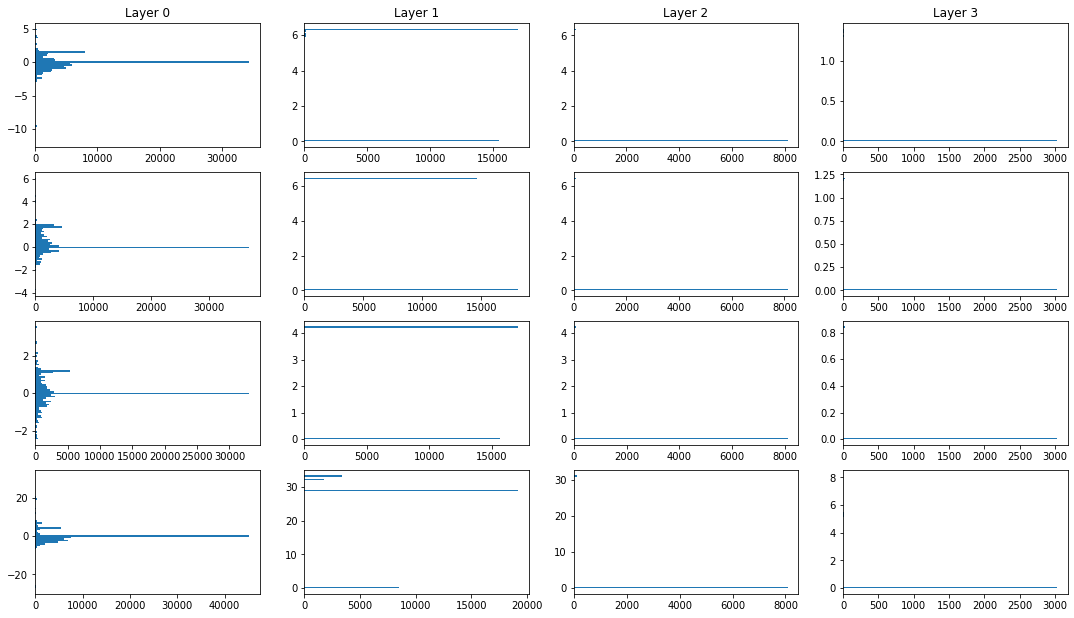

In [70]:
names = ['Ares', 'Athena', 'Zeus', 'Dionysus']

models = [load_model(name) for name in names]

plot_weights_distributions(models)

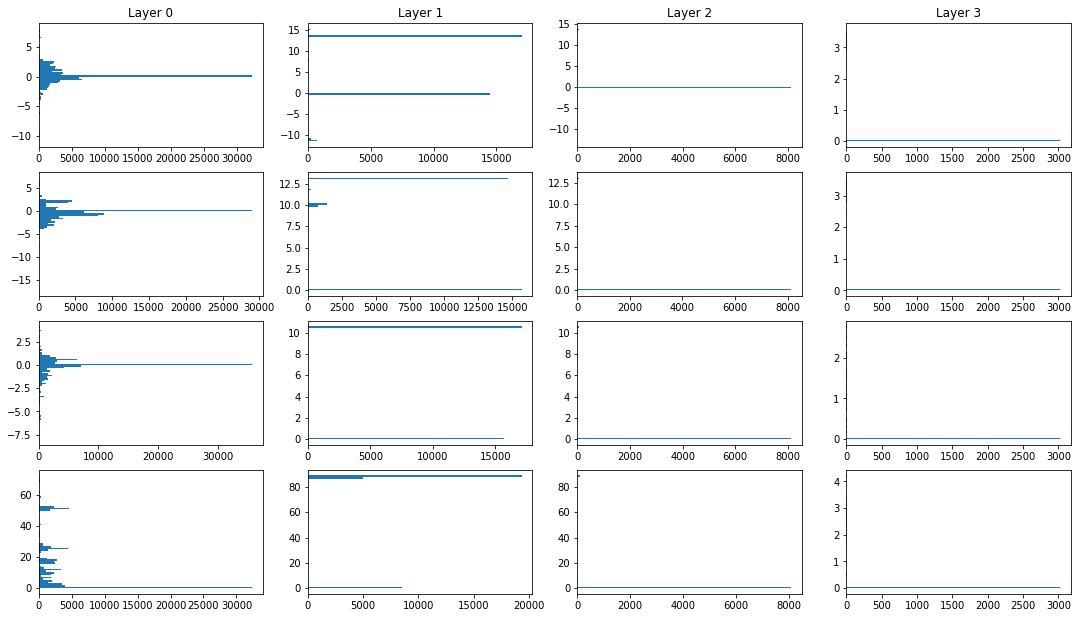

In [71]:
names = ['Ares', 'Athena', 'Zeus', 'Dionysus']

models = [load_model(name) for name in names]

plot_weights_distributions(models)

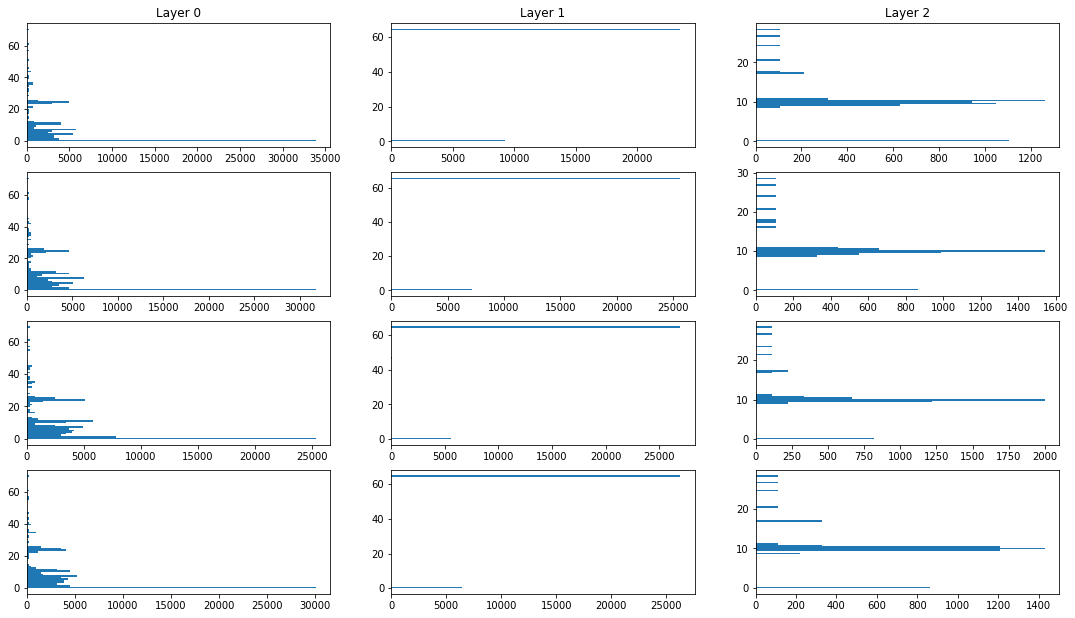

In [68]:
names = ['Red', 'Green', 'Blue', 'Yellow']

models = [load_model(name) for name in names]

plot_weights_distributions(models)

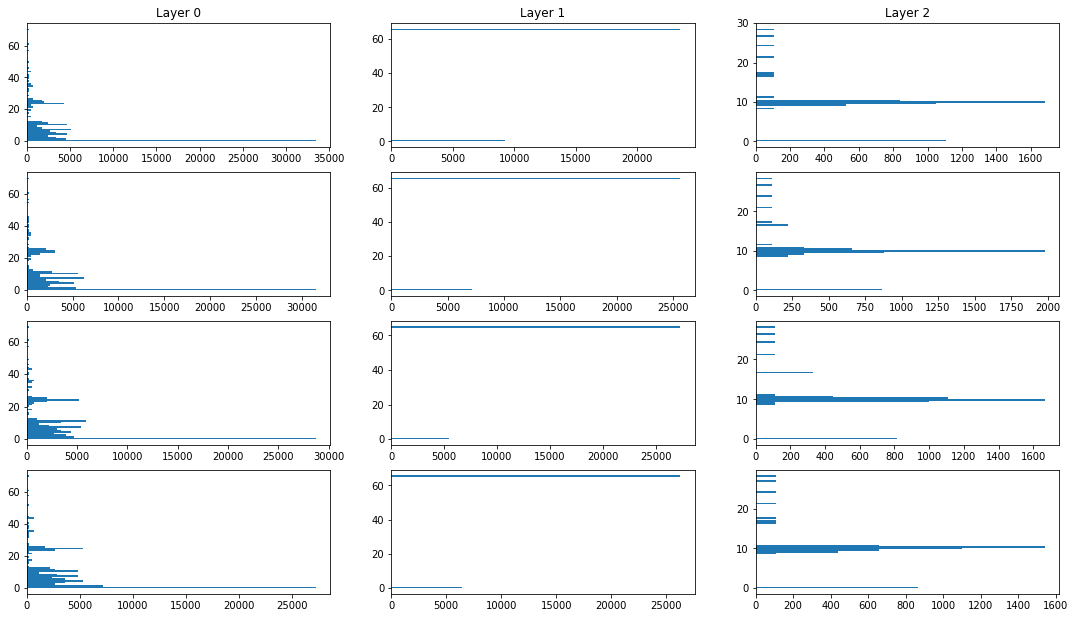

In [69]:
names = ['Red', 'Green', 'Blue', 'Yellow']

models = [load_model(name) for name in names]

plot_weights_distributions(models)

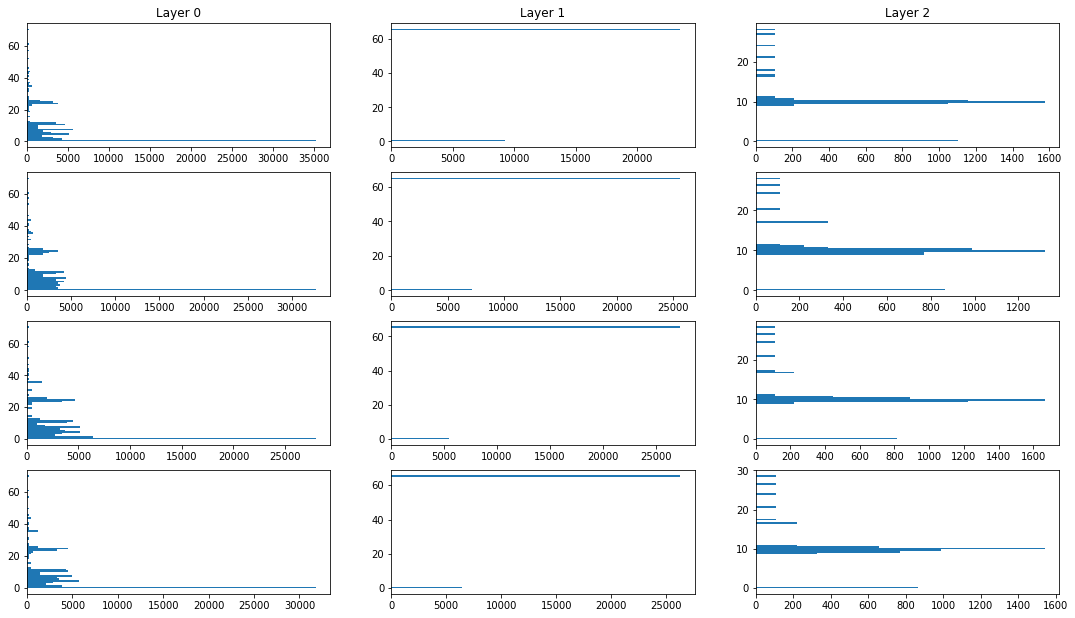

In [72]:
names = ['Red', 'Green', 'Blue', 'Yellow']

models = [load_model(name) for name in names]

plot_weights_distributions(models)

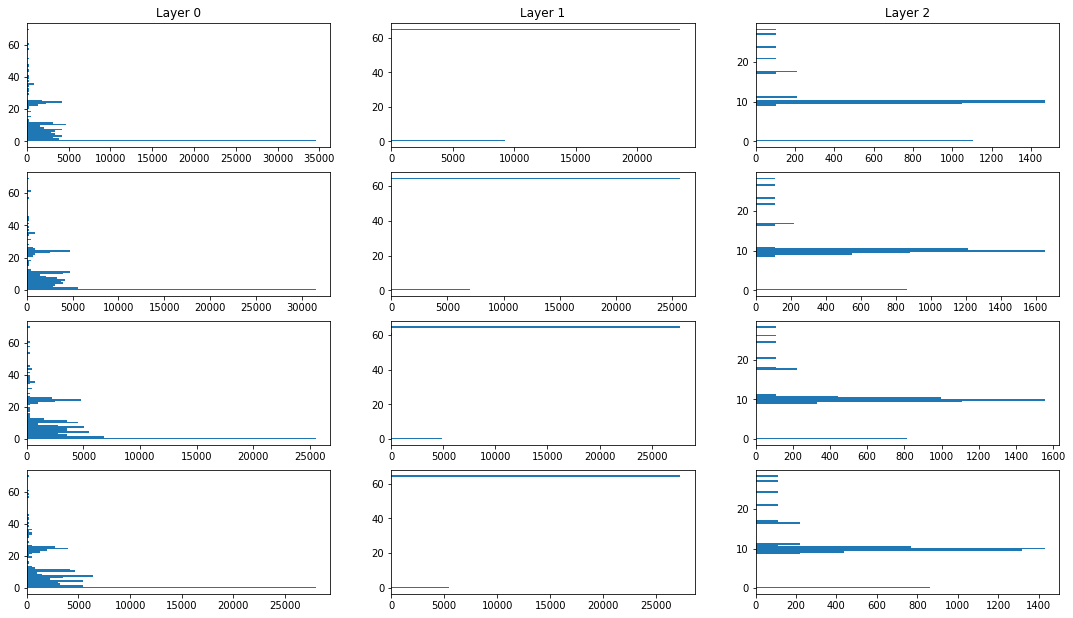

In [73]:
names = ['Red', 'Green', 'Blue', 'Yellow']

models = [load_model(name) for name in names]

plot_weights_distributions(models)